<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Mini_Project_5_BostonHousingSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from google.colab import files
import io
import sklearn.linear_model as lm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
Uploaded=files.upload()

In [ ]:
df=pd.read_csv('Boston.csv')
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
select_columns=['crim','indus','chas','nox','rm','age','dis','rad','tax','lstat','medv']
df=pd.read_csv('Boston.csv', usecols=select_columns)
df=df.dropna()
print(df)
df.describe()
df.dtypes

        crim  indus  chas    nox     rm   age     dis  rad  tax  lstat  medv
0    0.00632   2.31     0  0.538  6.575  65.2  4.0900    1  296   4.98  24.0
1    0.02731   7.07     0  0.469  6.421  78.9  4.9671    2  242   9.14  21.6
2    0.02729   7.07     0  0.469  7.185  61.1  4.9671    2  242   4.03  34.7
3    0.03237   2.18     0  0.458  6.998  45.8  6.0622    3  222   2.94  33.4
4    0.06905   2.18     0  0.458  7.147  54.2  6.0622    3  222   5.33  36.2
..       ...    ...   ...    ...    ...   ...     ...  ...  ...    ...   ...
501  0.06263  11.93     0  0.573  6.593  69.1  2.4786    1  273   9.67  22.4
502  0.04527  11.93     0  0.573  6.120  76.7  2.2875    1  273   9.08  20.6
503  0.06076  11.93     0  0.573  6.976  91.0  2.1675    1  273   5.64  23.9
504  0.10959  11.93     0  0.573  6.794  89.3  2.3889    1  273   6.48  22.0
505  0.04741  11.93     0  0.573  6.030  80.8  2.5050    1  273   7.88  11.9

[506 rows x 11 columns]


crim     float64
indus    float64
chas       int64
nox      float64
rm       float64
age      float64
dis      float64
rad        int64
tax        int64
lstat    float64
medv     float64
dtype: object

In [ ]:
df.isnull().sum()

crim     0
indus    0
chas     0
nox      0
rm       0
age      0
dis      0
rad      0
tax      0
lstat    0
medv     0
dtype: int64

In [ ]:
print(df['chas'].value_counts())

0    471
1     35
Name: chas, dtype: int64


In [ ]:
df.describe()

,crim,indus,chas,nox,rm,age,dis,rad,tax,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,12.653063,22.532806
std,8.601545,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,7.141062,9.197104
min,0.006320,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,1.730000,5.000000
25%,0.082045,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,6.950000,17.025000
50%,0.256510,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,11.360000,21.200000
75%,3.677083,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,16.955000,25.000000
max,88.976200,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,37.970000,50.000000


<Figure size 1600x1000 with 0 Axes>

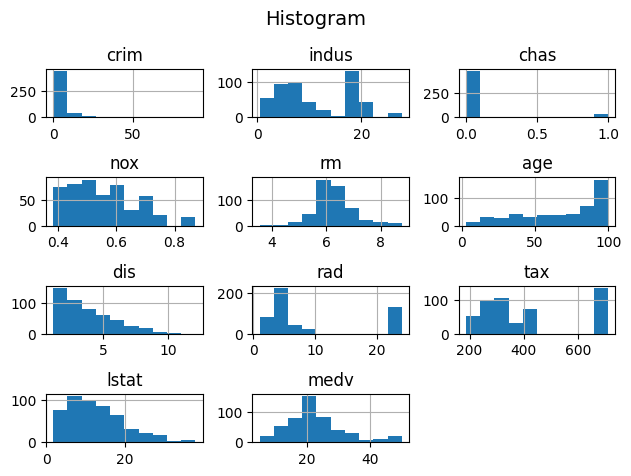

In [ ]:
plt.figure(figsize=(16,10))
df.hist()
plt.suptitle("Histogram", fontsize=14)
plt.tight_layout(pad=1)
plt.show()

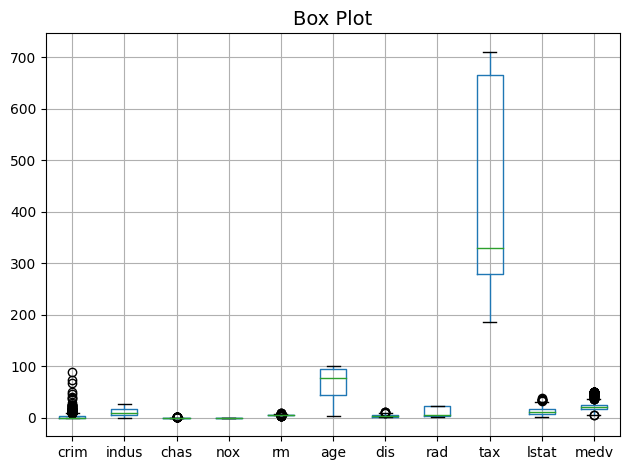

In [ ]:
df.boxplot()
plt.title("Box Plot", fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
corr1=df.corr()
print(corr1)

           crim     indus      chas       nox        rm       age       dis  \
crim   1.000000  0.406583 -0.055892  0.420972 -0.219247  0.352734 -0.379670   
indus  0.406583  1.000000  0.062938  0.763651 -0.391676  0.644779 -0.708027   
chas  -0.055892  0.062938  1.000000  0.091203  0.091251  0.086518 -0.099176   
nox    0.420972  0.763651  0.091203  1.000000 -0.302188  0.731470 -0.769230   
rm    -0.219247 -0.391676  0.091251 -0.302188  1.000000 -0.240265  0.205246   
age    0.352734  0.644779  0.086518  0.731470 -0.240265  1.000000 -0.747881   
dis   -0.379670 -0.708027 -0.099176 -0.769230  0.205246 -0.747881  1.000000   
rad    0.625505  0.595129 -0.007368  0.611441 -0.209847  0.456022 -0.494588   
tax    0.582764  0.720760 -0.035587  0.668023 -0.292048  0.506456 -0.534432   
lstat  0.455621  0.603800 -0.053929  0.590879 -0.613808  0.602339 -0.496996   
medv  -0.388305 -0.483725  0.175260 -0.427321  0.695360 -0.376955  0.249929   

            rad       tax     lstat      medv  
cri

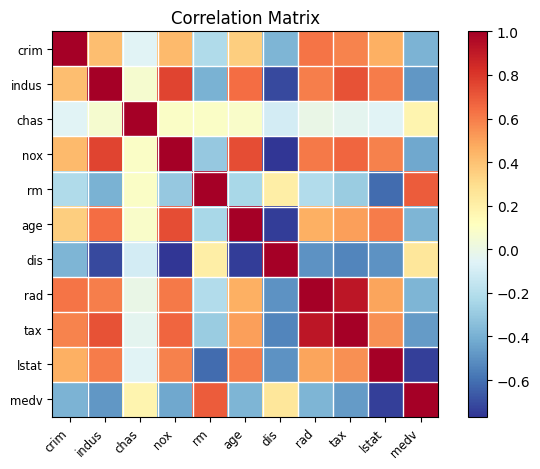

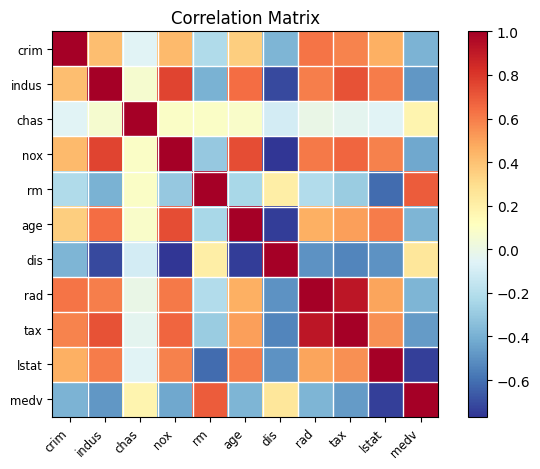

In [ ]:
sm.graphics.plot_corr(corr1, xnames=list(corr1.columns))

Text(0.5, 0.98, 'Pair Plot')

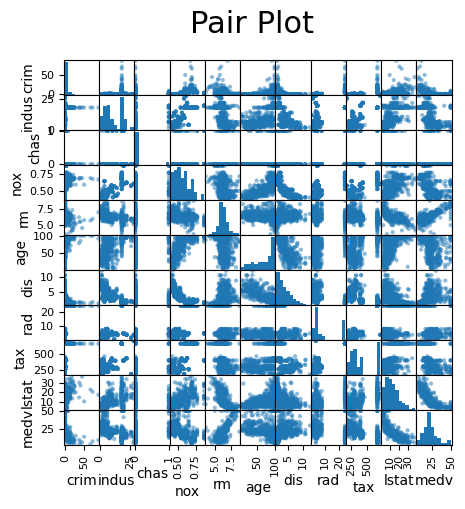

In [ ]:
scatter_matrix(df, figsize=(5,5))
plt.suptitle("Pair Plot", fontsize=22)

In [ ]:
lr=lm.LinearRegression()
X=df[['crim','indus','chas','nox','rm','age','dis','rad','tax','lstat']].values
y=df['medv'].values

In [ ]:
lr.fit(X,y)

LinearRegression()

In [ ]:
print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_)

Intercept:  14.09740987621933
Coefficient:  [-0.0962828  -0.09983598  3.64524291 -8.06266479  4.6836731  -0.01598038
 -1.15752369  0.13228108 -0.00999529 -0.55432258]


In [ ]:
df['medv_predict_lr']=lr.predict(X)
df

,crim,indus,chas,nox,rm,age,dis,rad,tax,lstat,medv,medv_predict_lr
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,4.98,24.0,28.960573
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,9.14,21.6,25.450221
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,4.03,34.7,32.145588
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,2.94,33.4,31.759434
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,5.33,36.2,30.994703
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0,0.573,6.593,69.1,2.4786,1,273,9.67,22.4,27.229871
502,0.04527,11.93,0,0.573,6.120,76.7,2.2875,1,273,9.08,20.6,25.442968
503,0.06076,11.93,0,0.573,6.976,91.0,2.1675,1,273,5.64,23.9,31.267954
504,0.10959,11.93,0,0.573,6.794,89.3,2.3889,1,273,6.48,22.0,29.716083


In [ ]:
print("R-Squared Value: ", r2_score(df.medv, df.medv_predict_lr))

R-Squared Value:  0.6885674567091034


In [ ]:
lr=lm.LinearRegression()
X=df[['crim','indus','chas','nox','rm','age','dis','rad','tax','lstat']].values
y=df['medv'].values
print(X.shape)

(506, 10)


In [ ]:
for deg in [1,2,3,4,5]:
  for i in range(X.shape[1]):
    lr.fit(np.vander(X[:,i],deg+1),y)
    y_lr=lr.predict(np.vander(X[:,i],deg+1))
  plt.plot(X,y_lr, label='degree '+str(deg))
  plt.legend(loc='upper left', bbox_to_anchor=(1,1))
  print("R Squared for degree "+str(deg)+ "=" , r2_score(y, y_lr))



In [ ]:
for deg in [1,2,3,4,5]:
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  lr.fit(X_poly, y)
  y_lr=lr.predict(X_poly)
  plt.plot(X, y_lr, label='degree '+str(deg))
  plt.legend(loc='upper left', bbox_to_anchor=(1,1))
  print("R Squared for degree "+str(deg)+ "=" , r2_score(y, y_lr))

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
for deg in [1,2,3,4,5]:
  model=make_pipeline(PolynomialFeatures(deg), lr)
  model.fit(X,y)
  y_lr=model.predict(X)
  plt.plot(X, y_lr, label='degree '+str(deg))
  plt.legend(loc='upper left', bbox_to_anchor=(1,1))
  print("R Squared for degree "+str(deg)+ "=" , r2_score(y, y_lr))

In [ ]:
deg=4
model=make_pipeline(PolynomialFeatures(deg), lr)
model.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

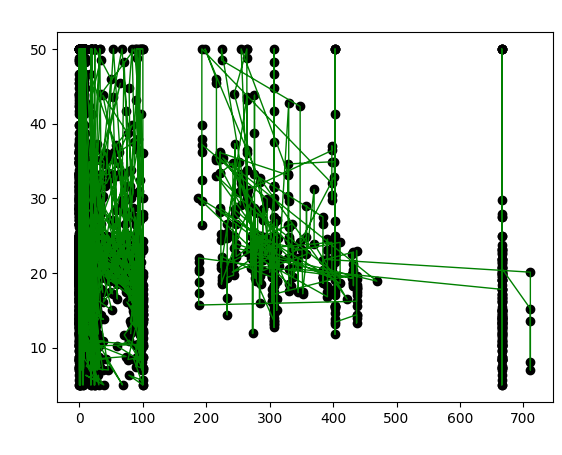

In [ ]:
for i in range(X.shape[1]):
  plt.scatter(X[:,i],y, color='black')
  plt.plot(X[:,i], model.predict(X),color='green', linewidth=1)
  plt.title(' ')
  plt.ylabel(' ')
  plt.xlabel(' ')

In [ ]:
print("R Squared:                       ", r2_score(y, model.predict(X)))
print("Mean Absolute Error Value:       ", mean_absolute_error(y, model.predict(X)))
print("Root Mean Squared Error Value:   ", np.sqrt(mean_squared_error(y, model.predict(X))))

R Squared:                        0.999999965845002
Mean Absolute Error Value:        0.0012905277738390819
Root Mean Squared Error Value:    0.0016980429250299264


In [ ]:
df['medv_predict_pr']=model.predict(X)
df

,crim,indus,chas,nox,rm,age,dis,rad,tax,lstat,medv,medv_predict_lr,medv_predict_pr
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,4.98,24.0,28.960573,24.000983
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,9.14,21.6,25.450221,21.602974
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,4.03,34.7,32.145588,34.701683
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,2.94,33.4,31.759434,33.402638
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,5.33,36.2,30.994703,36.200715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0,0.573,6.593,69.1,2.4786,1,273,9.67,22.4,27.229871,22.402077
502,0.04527,11.93,0,0.573,6.120,76.7,2.2875,1,273,9.08,20.6,25.442968,20.599499
503,0.06076,11.93,0,0.573,6.976,91.0,2.1675,1,273,5.64,23.9,31.267954,23.897703
504,0.10959,11.93,0,0.573,6.794,89.3,2.3889,1,273,6.48,22.0,29.716083,22.002704


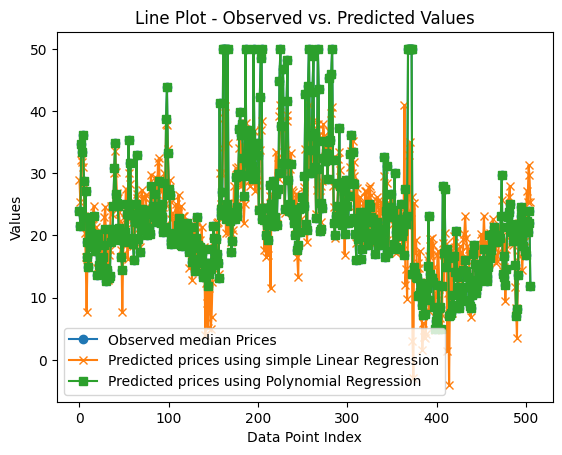

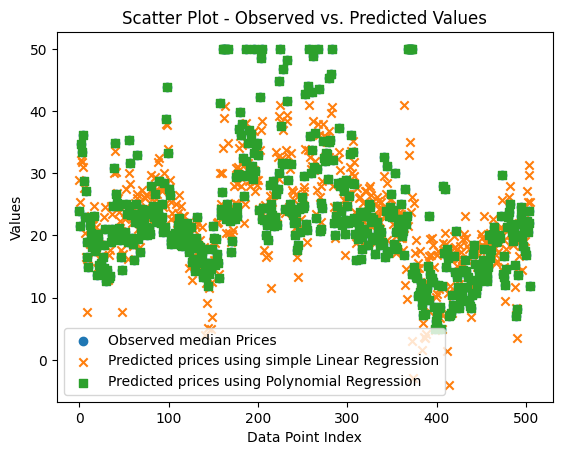

In [ ]:
plt.plot(df['medv'], label='Observed median Prices', marker='o')
plt.plot(df['medv_predict_lr'], label='Predicted prices using simple Linear Regression', marker='x')
plt.plot(df['medv_predict_pr'], label='Predicted prices using Polynomial Regression', marker='s')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()
plt.title('Line Plot - Observed vs. Predicted Values')
plt.show()

# Unordered data - Scatter Plot
plt.scatter(np.arange(len(df['medv'])), df['medv'], label='Observed median Prices', marker='o')
plt.scatter(np.arange(len(df['medv_predict_lr'])), df['medv_predict_lr'], label='Predicted prices using simple Linear Regression', marker='x')
plt.scatter(np.arange(len(df['medv_predict_pr'])), df['medv_predict_pr'], label='Predicted prices using Polynomial Regression', marker='s')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()
plt.title('Scatter Plot - Observed vs. Predicted Values')
plt.show()


In [ ]:
grouped=df.groupby(by='chas')
mean_medv_pr=grouped['medv_predict_pr'].mean()
mean_medv_pr.plot(kind='bar')
plt.ylabel("Median Price")
plt.xlabel("River Connection")
plt.title("Relation between Prices and Distance from River")
plt.yticks(range(0,40,2))
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [ ]:
selected_columns=['chas','medv','medv_predict_lr','medv_predict_pr']
corr=df[selected_columns].corr()
print(corr)
sm.graphics.plot_corr(corr, xnames=list(corr.columns))


In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot([df[df['chas'] == 0]['medv_predict_pr'],
             df[df['chas'] == 1]['medv_predict_pr']],
            labels=["Tract doesn't bound River", "Tract bounds River"])
plt.title('House Prices by proximity to the River')
plt.xlabel('River Proximity')
plt.ylabel('Prices of Houses')
plt.show()

In [ ]:
mean_prices_near_river = df[df['chas'] == 1]['medv_predict_pr'].mean()
mean_prices_not_near_river = df[df['chas'] == 0]['medv_predict_pr'].mean()
if mean_prices_near_river > mean_prices_not_near_river:
    print("Based on the analysis, house prices are generally more expensive near the tract bound by the River.")
elif mean_prices_near_river < mean_prices_not_near_river:
  print("Based on the analysis, house prices are generally less expensive near the tract bound by the River.")
else:
  print("Proximity to the River does not make much difference to the housing price in Boston")